<a href="https://colab.research.google.com/github/Jashwanth-Adonis/Check/blob/main/Copy_of_NM_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Install required packages (run this once)

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c7d41ab32102952d5b7ce0ef8ae7c14b27ccd78ff312fe8902a1a15528857f82
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from ydata_profiling import ProfileReport
from datetime import datetime


Upload the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_customer_data.csv to sample_customer_data.csv


 Read the dataset

In [ ]:
df = pd.read_csv('sample_customer_data.csv')


  1: Basic Statistics & Summary

In [ ]:
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

              Age  Annual_Income  Spending_Score  Purchase_Amount  \
count  100.000000     100.000000      100.000000       100.000000   
mean    43.350000   86770.480000       49.110000       984.517600   
std     14.904663   36926.579294       28.831413       598.802855   
min     19.000000   31802.000000        1.000000        40.460000   
25%     31.750000   52278.750000       24.750000       474.642500   
50%     42.000000   84800.500000       45.500000       927.330000   
75%     57.000000  117276.750000       66.500000      1469.745000   
max     69.000000  149181.000000       98.000000      1963.860000   

       Transaction_Frequency  
count             100.000000  
mean               15.080000  
std                 7.895376  
min                 2.000000  
25%                 9.000000  
50%                15.000000  
75%                21.250000  
max                29.000000  

Missing Values:
 Customer_ID              0
Age                      0
Gender                   0


Convert 'Purchase_Date' to datetime

In [ ]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

2: Correlation Analysis

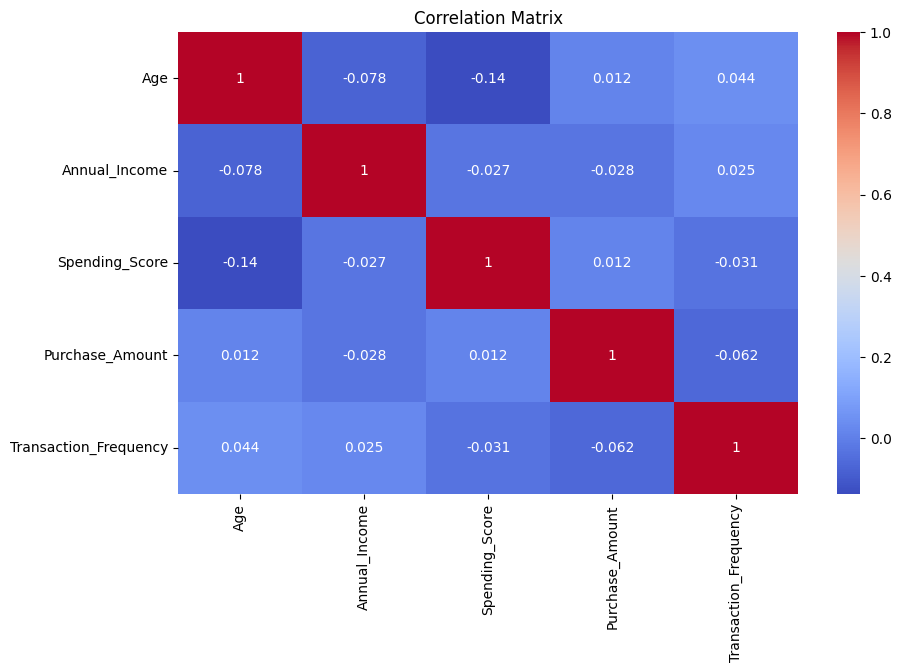

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

3: Z-Score Outlier Detection

In [ ]:
df['Z_Purchase_Amount'] = stats.zscore(df['Purchase_Amount'])
z_outliers = df[np.abs(df['Z_Purchase_Amount']) > 3]
print("Z-Score Outliers:\n", z_outliers[['Customer_ID', 'Purchase_Amount', 'Z_Purchase_Amount']])

Z-Score Outliers:
 Empty DataFrame
Columns: [Customer_ID, Purchase_Amount, Z_Purchase_Amount]
Index: []


4: Encoding Categorical Variables ---
 Label Encoding

In [ ]:
le = LabelEncoder()
df['Gender_Label'] = le.fit_transform(df['Gender'])
df['Membership_Label'] = le.fit_transform(df['Membership_Status'])

One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['Category_Purchased'])

 5: IQR Outlier Detection

In [ ]:
def detect_iqr_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

income_outliers = detect_iqr_outliers('Annual_Income')
spending_outliers = detect_iqr_outliers('Spending_Score')

6: Data Distribution & Visualization

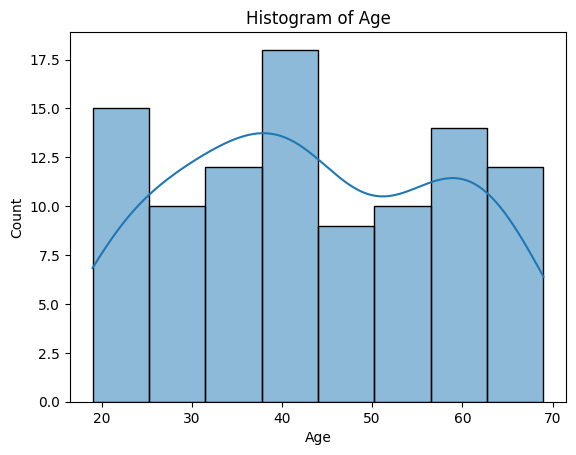

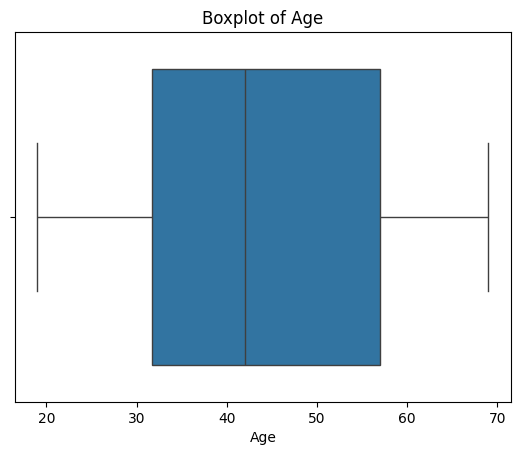

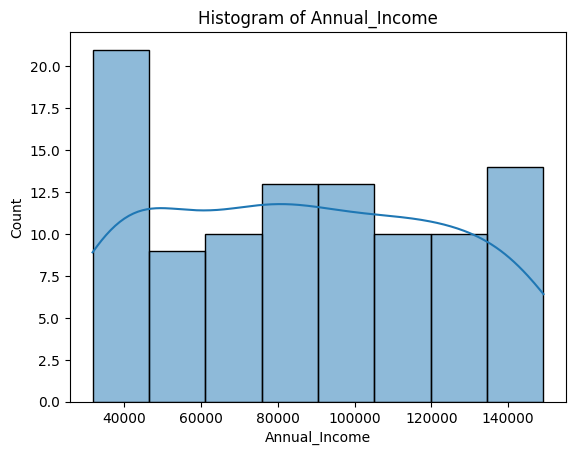

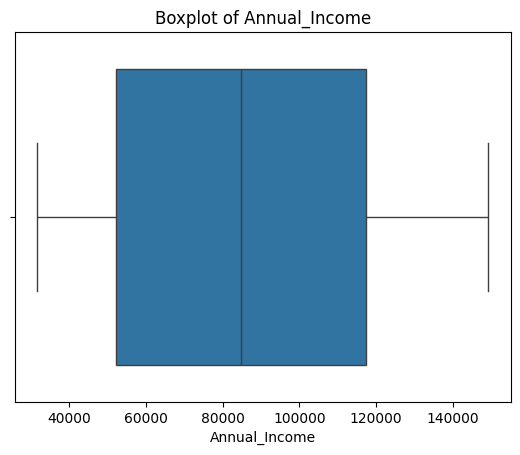

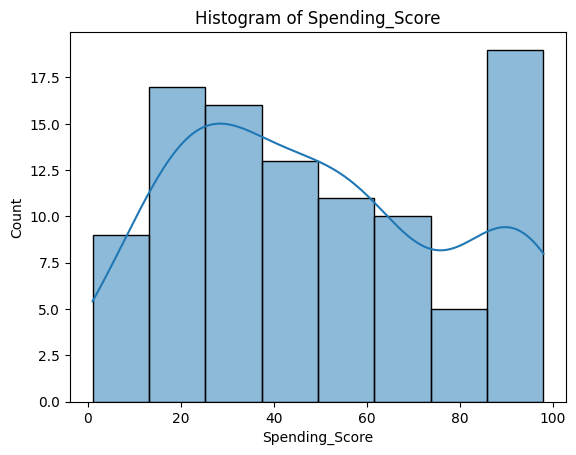

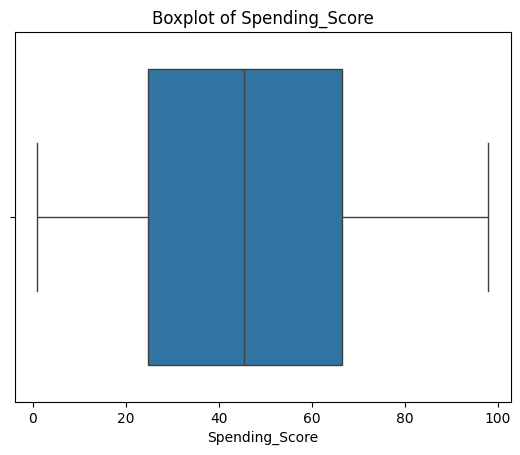

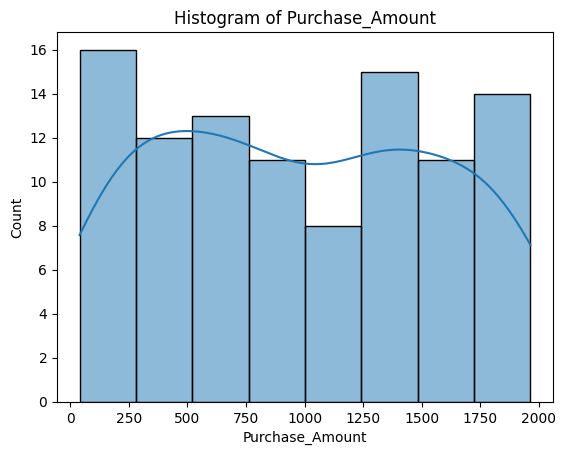

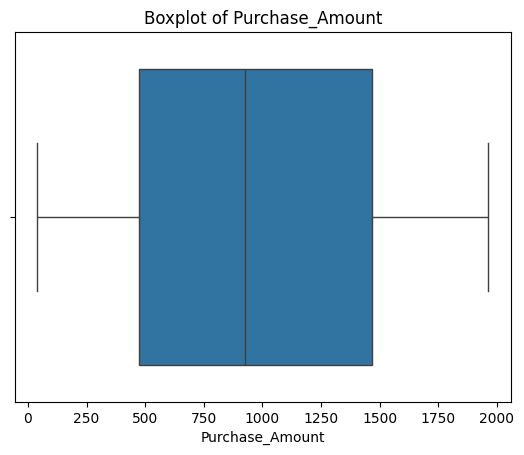

In [ ]:
cols = ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Amount']
for col in cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Pair Plot

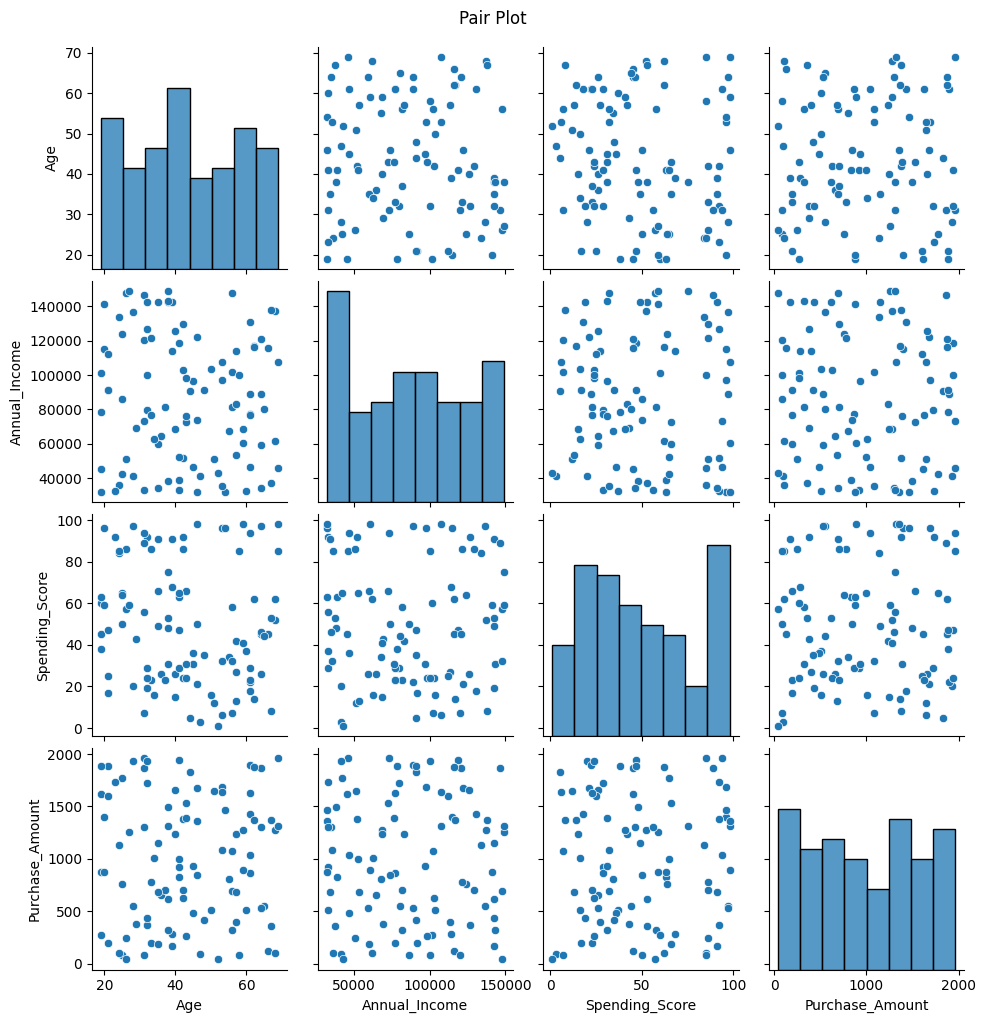

In [ ]:
sns.pairplot(df[cols])
plt.suptitle("Pair Plot", y=1.02)
plt.show()

7: Customer Segmentation with K-Means

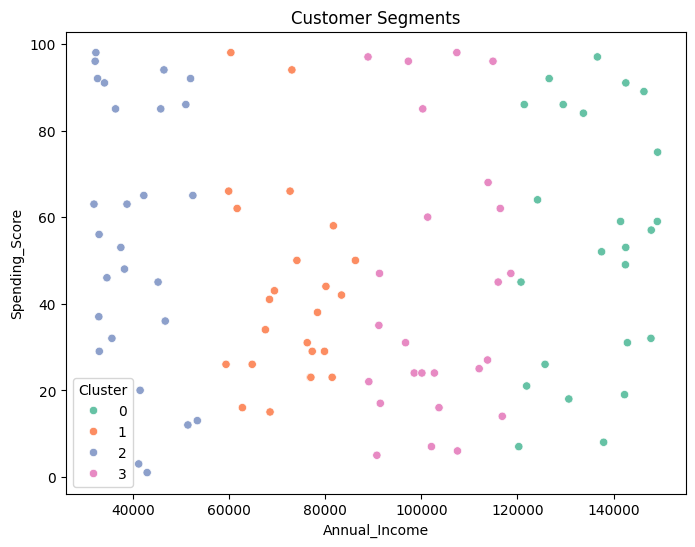

In [ ]:
X = df[['Annual_Income', 'Spending_Score']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='Set2')
plt.title("Customer Segments")
plt.show()

8: Time-Based Analysis

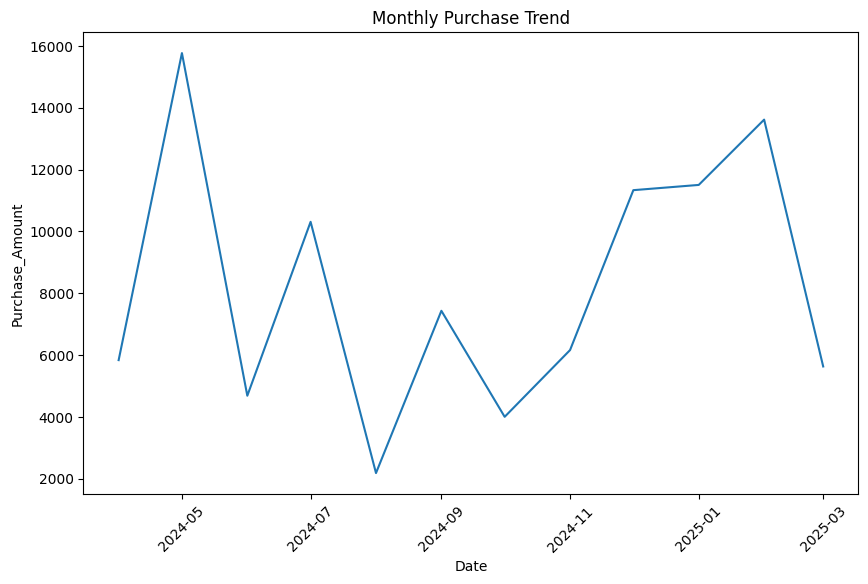

In [ ]:
df['Month'] = df['Purchase_Date'].dt.month
df['Year'] = df['Purchase_Date'].dt.year

monthly_trends = df.groupby(['Year', 'Month'])['Purchase_Amount'].sum().reset_index()
monthly_trends['Date'] = pd.to_datetime(monthly_trends[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trends, x='Date', y='Purchase_Amount')
plt.title("Monthly Purchase Trend")
plt.xticks(rotation=45)
plt.show()

9: Customer Behavior Analysis

In [ ]:
top_customers = df.groupby('Customer_ID')['Purchase_Amount'].sum().nlargest(5)
print("Top 5 Spending Customers:\n", top_customers)

Top 5 Spending Customers:
 Customer_ID
C002    1963.86
C051    1959.23
C020    1939.38
C100    1935.49
C012    1930.85
Name: Purchase_Amount, dtype: float64


In [ ]:
category_columns = [col for col in df.columns if col.startswith('Category_Purchased_')]
most_purchased_column = df[category_columns].sum().idxmax()
most_purchased = most_purchased_column.split('_')[-1]
print("Most Purchased Category:", most_purchased)

Most Purchased Category: Beauty


In [ ]:
membership_spending = df.groupby('Membership_Status')['Purchase_Amount'].mean()
print("Average Spend by Membership:\n", membership_spending)

Average Spend by Membership:
 Membership_Status
Basic        925.180000
Gold         940.114583
Platinum    1142.016296
Silver       911.217500
Name: Purchase_Amount, dtype: float64


10: Generate Automated EDA Report

In [ ]:
profile = ProfileReport(df, title="Customer Purchase EDA Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 96.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]